<a href="https://colab.research.google.com/github/sneha5678-cmyk/Marketing-research-methods-Sneha-Gupta_Jio-Institute/blob/main/REDDIT_Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw


In [ ]:
pip install praw
pip install textblob
pip install vaderSentiment


SyntaxError: invalid syntax (<ipython-input-12-e734b3f6adf9>, line 1)

In [ ]:
pip install praw textblob vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import praw

# Set up Reddit API credentials
reddit = praw.Reddit(client_id='2mnC3unOzohF1t4UUh-VUQ',
                     client_secret='P6kkBci7m5gtFkB3faFdjyQjl0CFlw',
                     user_agent='Sad_Bid7722')

# Search for Amazon-related posts in a subreddit
subreddit = reddit.subreddit('all')  # You can specify a specific subreddit, like 'Amazon'
search_query = 'Amazon'

posts = subreddit.search(search_query, limit=100)  # Fetch posts


In [ ]:
from textblob import TextBlob

# Analyze sentiment for each post
for post in posts:
    print(f"Title: {post.title}")
    analysis = TextBlob(post.title)
    sentiment = analysis.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)
    print(f"Sentiment: {sentiment}\n")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Stop buying from Amazon
Sentiment: 0.0

Title: Amazon driver breaks through motorcyclist blockade
Sentiment: 0.0

Title: Is this the beginning of the end of Amazon?
Sentiment: 0.0

Title: Why is Amazon so bad now? What happened?
Sentiment: -0.6999999999999998

Title: ULPT What type of products can you buy on Amazon, you receive it then you ask for a refund but Amazon let's you keep the products?
Sentiment: 0.0

Title: Amazon Scam Day 
Sentiment: 0.0

Title: My Amazon TV now unmutes itself during Prime Video commercial breaks
Sentiment: 0.0

Title: Cops bust picket line in New York as Teamsters strike at seven Amazon warehouses
Sentiment: 0.13636363636363635

Title: Amazon driver wrote on my porch railing with a sharpie
Sentiment: 0.0

Title: ‘Secret Level’ Renewed for Season 2 at Amazon Prime Video
Sentiment: -0.4

Title: ordered one monitor on amazon, got two delivered
Sentiment: 0.0

Title: 'Stressed' Amazon driver abandons 80 packages in Mass. woods during holiday shipping ru

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

for post in posts:
    print(f"Title: {post.title}")
    sentiment = analyzer.polarity_scores(post.title)
    print(f"Sentiment: {sentiment}\n")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



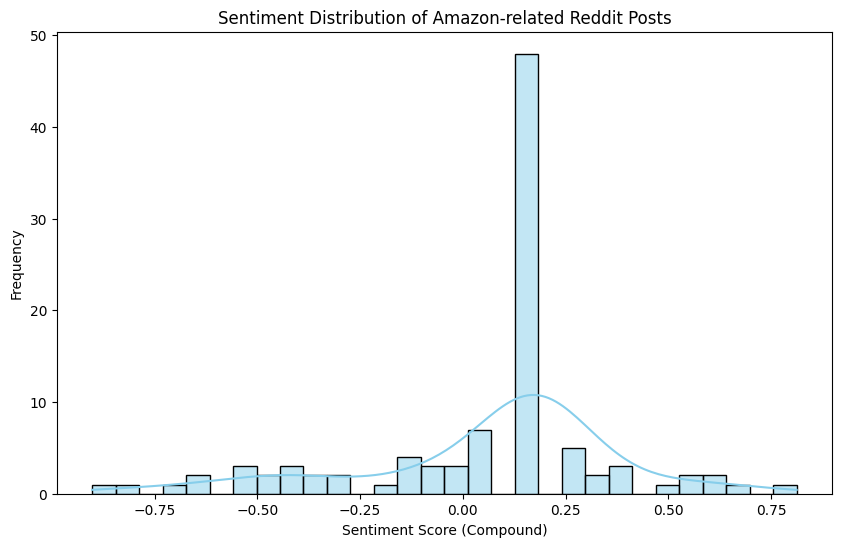

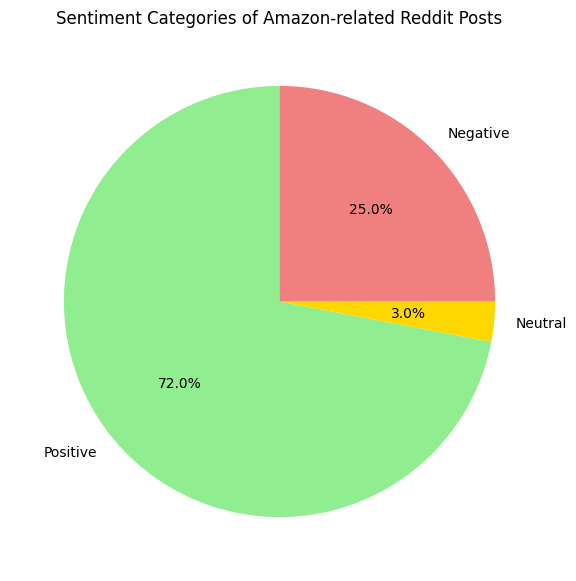

In [ ]:
import praw
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Set up Reddit API credentials
reddit = praw.Reddit(client_id='2mnC3unOzohF1t4UUh-VUQ',
                     client_secret='P6kkBci7m5gtFkB3faFdjyQjl0CFlw',
                     user_agent='Sad_Bid7722')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Fetch posts from a subreddit (example: 'Amazon' related posts)
subreddit = reddit.subreddit('all')  # Or use a specific subreddit like 'Amazon'
search_query = 'Amazon'
posts = subreddit.search(search_query, limit=100)

# Prepare lists for sentiment data
sentiments = []
categories = []

# Loop through each post and perform sentiment analysis
for post in posts:
    title = post.title
    sentiment = analyzer.polarity_scores(title)  # Get sentiment scores
    compound_score = sentiment['compound']  # The overall sentiment score

    # Store the sentiment score
    sentiments.append(compound_score)

    # Categorize sentiment
    if compound_score > 0.05:
        categories.append('Positive')
    elif compound_score < -0.05:
        categories.append('Negative')
    else:
        categories.append('Neutral')

# 1. **Histogram of Sentiment Scores**
plt.figure(figsize=(10, 6))
sns.histplot(sentiments, bins=30, kde=True, color='skyblue')

# Customize the plot
plt.title('Sentiment Distribution of Amazon-related Reddit Posts')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# 2. **Pie Chart of Sentiment Categories**
plt.figure(figsize=(7, 7))
plt.pie([categories.count('Positive'), categories.count('Neutral'), categories.count('Negative')],
        labels=['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%', startangle=90,
        colors=['lightgreen', 'gold', 'lightcoral'])
plt.title('Sentiment Categories of Amazon-related Reddit Posts')
plt.show()
